In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
import math

In [2]:
data_linear = np.loadtxt('../Data/linear_function_data.txt')
data_nonlinear = np.loadtxt('../Data/nonlinear_function_data.txt')

In [3]:
xl, yl = data_linear.T
xn, yn = data_nonlinear.T

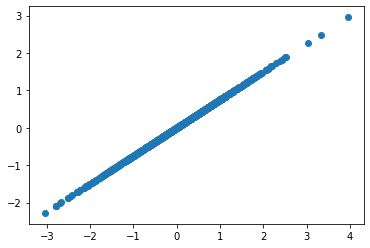

In [4]:
plt.scatter(xl,yl)
plt.show()

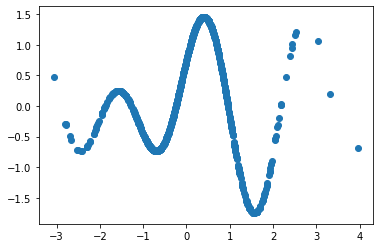

In [5]:
plt.scatter(xn,yn)
plt.show()

In [6]:
def least_squares(x ,y):
    a = np.vstack([x, np.ones(len(x))]).T
    return np.dot(np.linalg.inv(np.dot(a.T, a)), np.dot(a.T, y))

In [7]:
def least_squares_lib(x ,y):
    a = np.vstack([x, np.ones(len(x))]).T
    return np.linalg.lstsq(a, y, rcond=None)[0]

In [8]:
ml, cl = least_squares(xl, yl)
mn, cn = least_squares(xn, yn)

mll, cll = least_squares(xl, yl)
mnl, cnl = least_squares(xn, yn)

In [9]:
yfl = np.polyval([ml, cl], xl)
yfn = np.polyval([mn, cn], xn)

yfll = np.polyval([mll, cll], xl)
yfnl = np.polyval([mnl, cnl], xn)

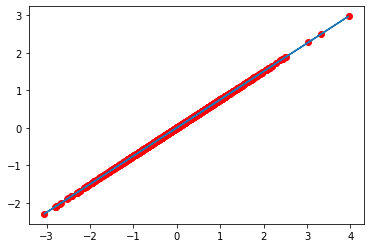

In [10]:
plt.plot(xl, yl, 'or')
plt.plot(xl, yfl)
plt.show()

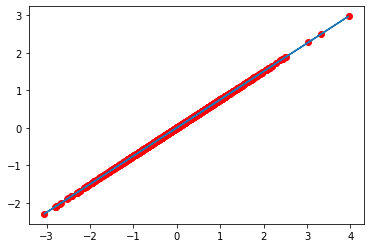

In [11]:
plt.plot(xl, yl, 'or')
plt.plot(xl, yfll)
plt.show()

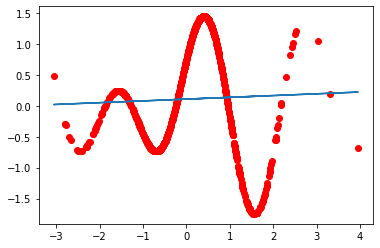

In [12]:
plt.plot(xn, yn, 'or')
plt.plot(xn, yfn)
plt.show()

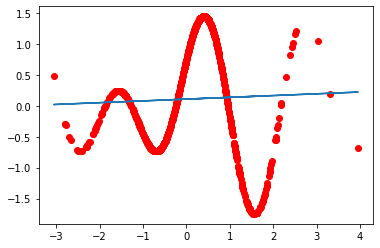

In [13]:
plt.plot(xn, yn, 'or')
plt.plot(xn, yfnl)
plt.show()

In [14]:
def rbf(x, xl, epsilon, plot=True):
    r = np.exp(-(x-xl)**2 / (epsilon**2))
    if plot:
        plt.plot(x, r, '.')
    return r

In [15]:
def least_squares_radial(x, y, l, epsilon=1, plot=True):

    if plot:
        fig = plt.figure(figsize=(12,12))
    
    points = []
    results = []
    
    for i in range(l):
        points.append(np.min(x) + (i*(np.max(x)-np.min(x))/l))
                          
    for i in range(l):
        xl = np.ones(len(x))*points[i]
        if plot:
            results.append(rbf(x, xl, epsilon))
        else:
            results.append(rbf(x, xl, epsilon, plot=False))
        
    results = np.array(results)
        
    print(results.shape)
     
    if plot:
        plt.show()
        
    c = np.vstack([results, np.ones(results.shape)]).T
    
    return np.linalg.lstsq(c, y, rcond=None)[0]

(10, 1000)


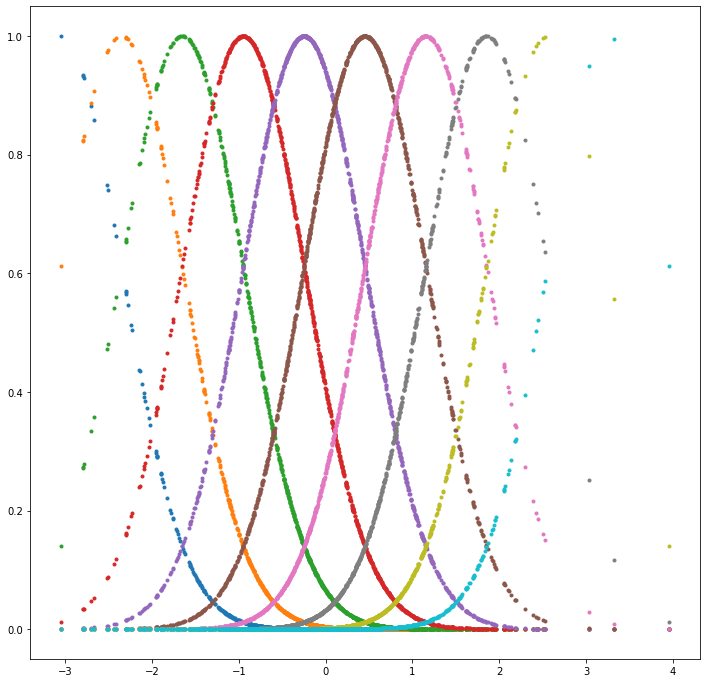

In [16]:
coef = least_squares_radial(xn, yn, 10)

In [17]:
def plot_radials(x, coef, l=10, epsilon=1, plot=False):

    points = []

    final = np.zeros_like(x)

    for i in range(l):
        points.append(np.min(x) + (i*(np.max(x)-np.min(x))/l))

    for i in range(l):
        xl = np.ones(len(x))*points[i]
        
        r = np.exp(-(x-xl)**2 / (epsilon**2))*coef[i]
        final = final + r
        if(plot):
            plt.plot(x, r, '.')
    
    return final

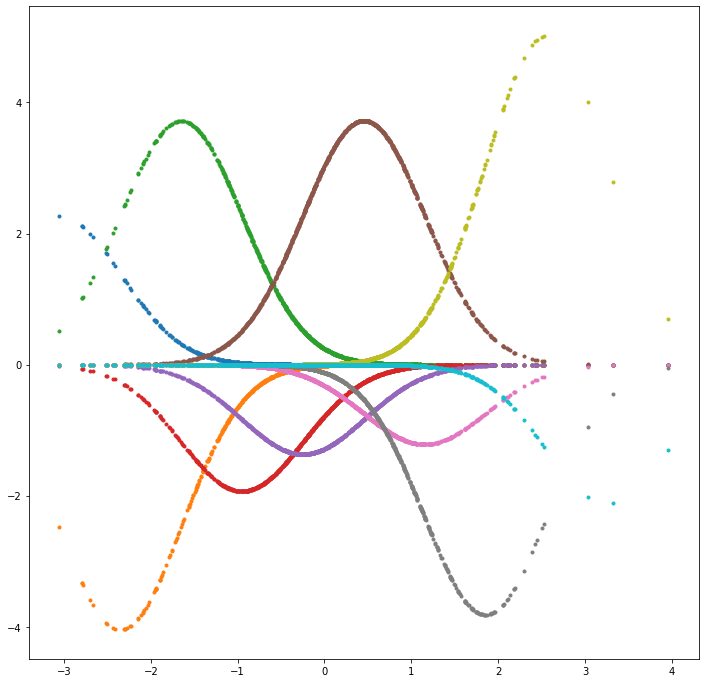

In [18]:
fig = plt.figure(figsize=(12,12))
final = plot_radials(xn, coef, plot=True)
plt.show()

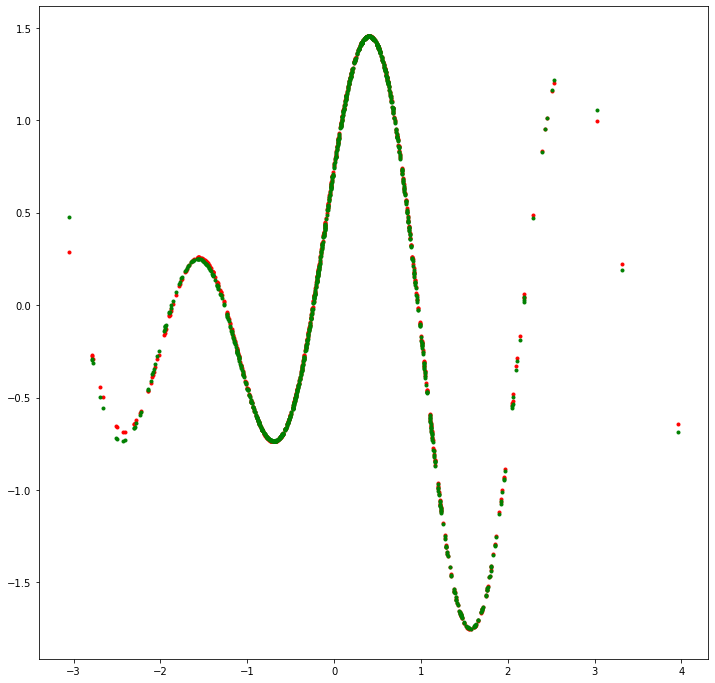

In [19]:
fig = plt.figure(figsize=(12,12))
plt.plot(xn, final, '.r')
plt.plot(xn, yn, '.g')

(10, 1000)
(10, 1000)
(10, 1000)
(10, 1000)
(10, 1000)


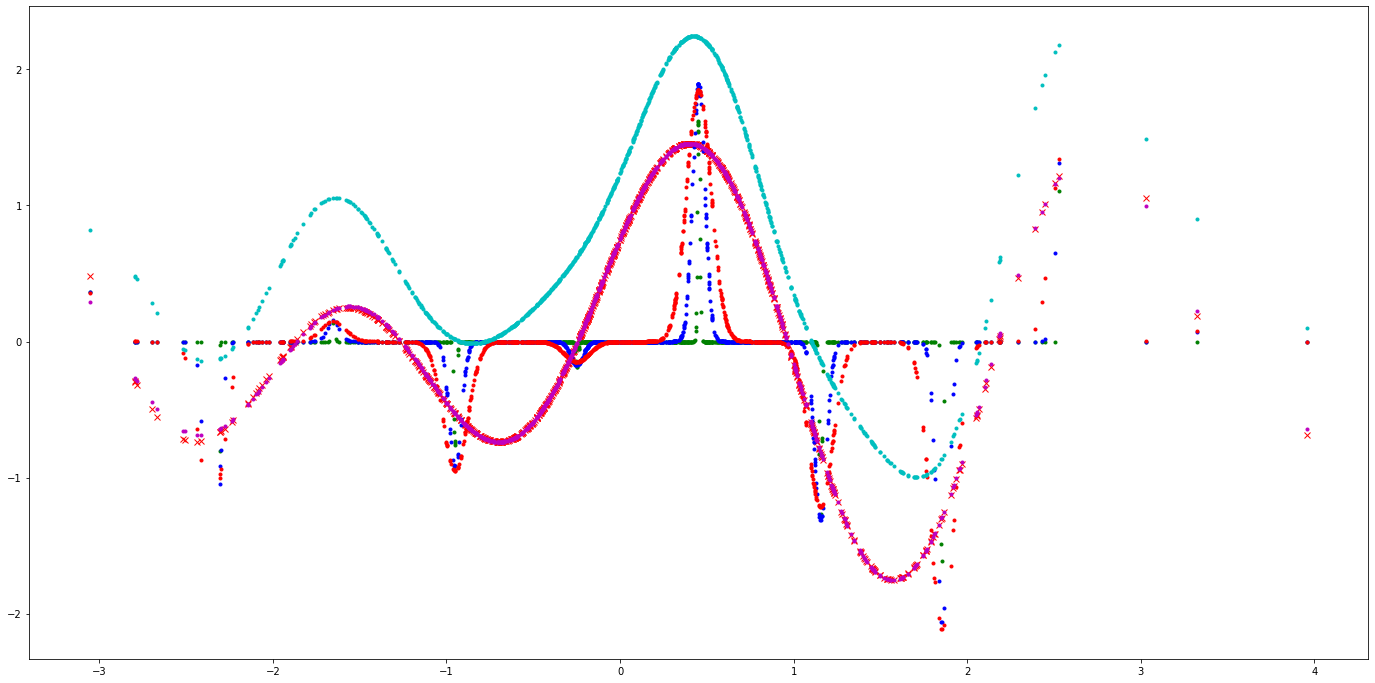

In [27]:
er = [0.01, 0.05, 0.1, 0.5, 1]
colors = ['.g', '.b', '.r', '.c', '.m']

fig = plt.figure(figsize=(24,12))

plt.plot(xn, yn, 'xr')

for (i, e) in enumerate(er):
    coef = least_squares_radial(xn, yn, 10, epsilon=e, plot=False)
    final = plot_radials(xn, coef, epsilon=e)
    plt.plot(xn, final, colors[i])
